## 1. Imports

In [ ]:
import random
import os
import math
import re
import string
import pickle
import time

import numpy as np
import pandas as pd
import torchtext
import torch
import torchvision.transforms as T
import torch.optim as optim
import torchvision.models as models
import torch.nn.functional as F
import cv2
import nltk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from torch import nn
from torch import Tensor
from torch.utils.data import DataLoader, Dataset, Subset
from nltk.tokenize import word_tokenize
from collections import Counter
from PIL import Image
from tqdm.notebook import tqdm
from datetime import datetime

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## 2. Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_links_gdrive = [
    "https://drive.google.com/file/d/1Jkm35yNj0Nb3DQsJXHUxbhalhiq1vxbv/view?usp=sharing",
    "https://drive.google.com/file/d/1-0svurJLd_VhGS2JF17oIH69y-5MTQB3/view?usp=sharing",
    "https://drive.google.com/file/d/1_uIJ9-UL2fbCkVN7gy_m4quwbRsp4HX7/view?usp=sharing",
    "https://drive.google.com/file/d/1h-iOEl9rJ5bbkKDpg6gFIuvvWe3xaJCE/view?usp=sharing",
    "https://drive.google.com/file/d/1-8P4VWuRpxfF4ZljrxAvl1ihMr-A4Z4u/view?usp=sharing",
    "https://drive.google.com/file/d/1-F2glfcKGn0S0EDawjRrx9VnT60m6gh4/view?usp=sharing",
    "https://drive.google.com/file/d/1-Ckc3vAYkadCDUTZrdI36As5LDtVE6qL/view?usp=sharing",
    "https://drive.google.com/file/d/1UEa_XKo4Ny94dya5wLPERG8irnwgzyVY/view?usp=sharing",
    "https://drive.google.com/file/d/1eCls2oGaHUDSxEnWRwDMiL7F1NqGxmmF/view?usp=sharing",
    "https://drive.google.com/file/d/1-1wbEtXtOcExLVc5152uPcTaCjGg58wd/view?usp=sharing",
    "https://drive.google.com/file/d/1-JD-xOyihbfm1lky6AnbwKuVKWNtUmg8/view?usp=sharing",
    "https://drive.google.com/file/d/15YE80D9Xm_4ad85QryYjQXWIwwPP93jv/view?usp=sharing",
    "https://drive.google.com/file/d/1-9ou1HTMoZlxUYAlFVGEajY3R9WDsCJo/view?usp=sharing",
    "https://drive.google.com/file/d/1-BCRhWnVuYx83S2uH-vEPA8zLhy7H_eF/view?usp=sharing",
    "https://drive.google.com/file/d/1-BQtCGavXKwBjTp54KpslrIADMRd3Qgm/view?usp=sharing",
    "https://drive.google.com/file/d/1oKvVPWSH4_lgDpS3j6OHURv4hkWkpwB8/view?usp=sharing",
    "https://drive.google.com/file/d/1-86O7Ikn80_GhzmUQ4ixqL7M3-z1hmfU/view?usp=sharing",
    "https://drive.google.com/file/d/1-MI6cVHpsIqYDZj87r-aZp5Atsq0BJ2S/view?usp=sharing",
    "https://drive.google.com/file/d/1-O9riEJZHlyxDX0rIiESukBURB5YLCtD/view?usp=sharing",
    "https://drive.google.com/file/d/1-QMLD3hVOkD5NhgpPjq6j2V8qmgEHlex/view?usp=sharing",
    "https://drive.google.com/file/d/1hU-kBX4-hqd3HUV0uqaB5j50f9NkjGRt/view?usp=sharing",
    "https://drive.google.com/file/d/1-6i3fnOjKr7GCcAqZTGrhbtaqbAAc0Aa/view?usp=sharing",
    "https://drive.google.com/file/d/1-AHS4yIcvgMbUkLP9P8I9U9-ScnX3G9r/view?usp=sharing",
    "https://drive.google.com/file/d/1nkLpbjE7QmPJ6CqRoLxxwDl7f2thqfmv/view?usp=sharing",
    "https://drive.google.com/file/d/1f-2fjOJKlND7llOuU1QyJbWLnGgKWJ53/view?usp=sharing",
    "https://drive.google.com/file/d/13naICXbeC86U65IWRuoq_-p4SM8XN9aC/view?usp=sharing",
    "https://drive.google.com/file/d/1-OKzxaOCNkzfZYTE3lrMijNN-kh7pTcB/view?usp=sharing",
    "https://drive.google.com/file/d/17ZqAg6nJIXrBhLdNd3cTAymwUV5kWu5A/view?usp=sharing",
    "https://drive.google.com/file/d/1-0xNf69mUceiXTS-EGrAKnkO_whZDNf6/view?usp=sharing",
    "https://drive.google.com/file/d/1Dl-VDD_L8mWfGoLTN_Z56CD2hhJCndJC/view?usp=sharing",
    "https://drive.google.com/file/d/1-46A0lGR6bKoSOJy7RqiqdPN4jZO8A9b/view?usp=sharing",
    "https://drive.google.com/file/d/1wXOgrG9zlJLGtoUz5TZnZkRGYWKbMCIZ/view?usp=sharing",
    "https://drive.google.com/file/d/1-FaHtNlHzL_N4dp_wVRq8ndb2cwpSnlb/view?usp=sharing",
    "https://drive.google.com/file/d/1-I-PrByg0T_TfDSI29b2dbVHYdG2zrmY/view?usp=sharing",
    "https://drive.google.com/file/d/1C8cybd_Lg_ElTXW3w_xyqYTGHSDNMZ_T/view?usp=sharing",
    "https://drive.google.com/file/d/1-2H-q-xluGCRBdKjYNx8B2OzJpshGzk4/view?usp=sharing",
    "https://drive.google.com/file/d/1-8DnlPVaTAcPZut8-yCRVfxn3pvTRMDt/view?usp=sharing",
    "https://drive.google.com/file/d/1-8o--evUfFTpAZIVPSUvsG3mEqcJLqyw/view?usp=sharing",
    "https://drive.google.com/file/d/1--07CFpehJct82TtOBeETxF23v2jWyp_/view?usp=sharing",
    "https://drive.google.com/file/d/1-4e88zLVxhqwHP52TdCce4ilC1vjXEH_/view?usp=sharing"
    ]

In [ ]:
zip_links_dropbox = [
    "https://www.dropbox.com/scl/fi/szac82ym3tj0yzwkv5a7c/part_1.zip?rlkey=pestjs7v6swa959u05roke9lj&dl=0",
    "https://www.dropbox.com/scl/fi/evi80nkhp7sewuj02ed71/part_2.zip?rlkey=fvb6qk11sw35c6mavejsp9mt4&dl=0",
    "https://www.dropbox.com/scl/fi/oq54sc2i1jve85uabxh9q/part_3.zip?rlkey=0ilxpz8eqix4fwehw7uy52si4&dl=0",
    "https://www.dropbox.com/scl/fi/6ldtal629byqa1jnlaf5w/part_4.zip?rlkey=qwrd2038g0eenhce3e5tnqsy2&dl=0",
    "https://www.dropbox.com/scl/fi/llhzzx3x5o8gvp6t0lfu1/part_5.zip?rlkey=lg70v98hvxasptys9iczumhmc&dl=0",
    "https://www.dropbox.com/scl/fi/8dhx7pg3o6jb7ed9yghp6/part_6.zip?rlkey=69ft84ifafji5g0m003h4xyyb&dl=0",
    "https://www.dropbox.com/scl/fi/qx33m9kk6a5rqmgfgca0j/part_7.zip?rlkey=xc4nu524rrrdc9wxxvw5l0oc6&dl=0",
    "https://www.dropbox.com/scl/fi/ug5g7cpcxnyx9kh4vvyfh/part_8.zip?rlkey=0t93ytx55zpwxoucfsu7w6o2e&dl=0",
    "https://www.dropbox.com/scl/fi/rzlvkfst6f88qknu6qkb7/part_9.zip?rlkey=dbwt3jw3buizzjhblajt2wex8&dl=0",
    "https://www.dropbox.com/scl/fi/tjaac792k5tvw834oiolj/part_10.zip?rlkey=cpnmi24pwnk6wxyx4qnpitzz9&dl=0",
    "https://www.dropbox.com/scl/fi/gjtqy0ac6ys3qw12y18iq/part_11.zip?rlkey=uhl5foa3tbvz9oxyparhg95xb&dl=0",
    "https://www.dropbox.com/scl/fi/go5t7h7je2j8ej243z6r9/part_12.zip?rlkey=xa69ux0krytmlnj91vies03m7&dl=0",
    "https://www.dropbox.com/scl/fi/od69dgk0yhayczm7h5a7v/part_13.zip?rlkey=junsr20j9xtu4gq4l95o1zi5u&dl=0",
    "https://www.dropbox.com/scl/fi/amy3ermer1hfnfwurtfwq/part_14.zip?rlkey=zyl1v8qh34bty1ggtk5zs30q7&dl=0",
    "https://www.dropbox.com/scl/fi/farjgge8ax9k2b0xn1swa/part_15.zip?rlkey=9o05cd4icpy3u58377e5rszhs&dl=0",
    "https://www.dropbox.com/scl/fi/nsxkgwnwcvzxd3q4y40id/part_16.zip?rlkey=b51go22pejixn896a0t5w3dg2&dl=0",
    "https://www.dropbox.com/scl/fi/kwttm4ux5adlfurclem8k/part_17.zip?rlkey=tte009ydoec1kbmg1z6k98lww&dl=0",
    "https://www.dropbox.com/scl/fi/ru6n05eley62f8i0d203f/part_18.zip?rlkey=ard7xer6ltdjgshxwdy5ly9ig&dl=0",
    "https://www.dropbox.com/scl/fi/vlkeax78sb6n0p2wgsy46/part_19.zip?rlkey=iak0xxkkvj18xbjd362h36klk&dl=0",
    "https://www.dropbox.com/scl/fi/w1cx7hr6tn18pv6d0kdm6/part_20.zip?rlkey=sngdwfgstezr6qzfx2ci70s5o&dl=0",
    "https://www.dropbox.com/scl/fi/cohr3pdmj5s335u2gif21/part_21.zip?rlkey=sx5adwsr390vywm2z8y36i4ig&dl=0",
    "https://www.dropbox.com/scl/fi/mu8rqzf57tm698yia5dck/part_22.zip?rlkey=9eblzoxo953o32uxo817tbdt8&dl=0",
    "https://www.dropbox.com/scl/fi/7nfsk4y1leuxpzctovthk/part_23.zip?rlkey=7be01a59gxn6bkzg5rntrl6g6&dl=0",
    "https://www.dropbox.com/scl/fi/cc0kgvvy9jsdyvhf1mj03/part_24.zip?rlkey=ldvhpb057fji91meykcjy385x&dl=0",
    "https://www.dropbox.com/scl/fi/kxsqcrom04y6ug25wopeu/part_25.zip?rlkey=36u3hfr6ruufyqvcv06v0ib9t&dl=0",
    "https://www.dropbox.com/scl/fi/hg9z8hngb1cv1pogpp1mv/part_26.zip?rlkey=049fgbzggr543nhl0p02lnpzj&dl=0",
    "https://www.dropbox.com/scl/fi/9cvju8up83zdyivh6rtyy/part_27.zip?rlkey=ho5w2tarikoex6y9rfs1pdm44&dl=0",
    "https://www.dropbox.com/scl/fi/9xpt217aeaaeh6rrp0lzw/part_28.zip?rlkey=px3dyz9rp26w2z34x4py1a2v8&dl=0",
    "https://www.dropbox.com/scl/fi/q9z6cbkbcgdyymaucjc9w/part_29.zip?rlkey=gzs34pakcbc99b4chetrgcbal&dl=0",
    "https://www.dropbox.com/scl/fi/pzd2mppdb9r62wh905b85/part_30.zip?rlkey=reufkzvz63h73cuaum3bjpp5l&dl=0",
    "https://www.dropbox.com/scl/fi/gh4cqi21geqat2tgse0au/part_31.zip?rlkey=077mkl9p1tf8sgvz1o7kohahd&dl=0",
    "https://www.dropbox.com/scl/fi/ke8po8nmmx8448vbkuia6/part_32.zip?rlkey=uef1e2c8y9hchcxc5n11hsrwq&dl=0",
    "https://www.dropbox.com/scl/fi/j580fm83qgsr328yg71gb/part_33.zip?rlkey=s3udphftq8da39myjfmudoj6i&dl=0",
    "https://www.dropbox.com/scl/fi/wnlvpd8a3c9d0fg1soa3b/part_34.zip?rlkey=dq5e6s10e4xqzl47rrsxergjo&dl=0",
    "https://www.dropbox.com/scl/fi/8o9qes1jshb1jqpqzeaf0/part_35.zip?rlkey=do3b0u70ger356yfziteqhvwa&dl=0",
    "https://www.dropbox.com/scl/fi/yujg2qv9ml21lh0g5xx50/part_36.zip?rlkey=ifhepm1j72avrlxp77cei79xy&dl=0",
    "https://www.dropbox.com/scl/fi/8n8dzliqyvlhi71u6oppc/part_37.zip?rlkey=sbpcz3ddymhpfr7gcfqc8k29l&dl=0",
    "https://www.dropbox.com/scl/fi/ydmsyr4ndjakbdv1o2kia/part_38.zip?rlkey=pjf75ssh6ka5htnzibc3vsz2f&dl=0",
    "https://www.dropbox.com/scl/fi/4awa6y7pvnr5rmsjkihtm/part_39.zip?rlkey=y35290y1pjohifb1me187ovi1&dl=0",
    "https://www.dropbox.com/scl/fi/etiuax5g4r8pwqczveklo/part_40.zip?rlkey=8f7vweg2xdzk0x0tupcsxcng8&dl=0"
    ]

In [ ]:
data_root = "/content/images"
if not os.path.exists(data_root):
    os.mkdir(data_root)
    assert os.path.exists(data_root)

for i in range(len(zip_links_gdrive)):
    compressed_dataset_path = f"/content/part_{i+1}.zip"
    if not os.path.exists(compressed_dataset_path):
        try:
            zip_link = zip_links_gdrive[i]
            !gdown --fuzzy $zip_link
            !unzip -q $compressed_dataset_path -d $data_root
            os.remove(f"/content/part_{i+1}.zip")
        except:
            zip_link = zip_links_dropbox[i]
            !wget -O "part_{i+1}.zip" $zip_link
            !unzip -q $compressed_dataset_path -d $data_root
            os.remove(f"/content/part_{i+1}.zip")

Downloading...
From: https://drive.google.com/uc?id=1Jkm35yNj0Nb3DQsJXHUxbhalhiq1vxbv
To: /content/part_1.zip
100% 2.26G/2.26G [00:25<00:00, 88.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-0svurJLd_VhGS2JF17oIH69y-5MTQB3
To: /content/part_2.zip
100% 2.66G/2.66G [00:30<00:00, 87.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_uIJ9-UL2fbCkVN7gy_m4quwbRsp4HX7
To: /content/part_3.zip
100% 2.79G/2.79G [00:29<00:00, 94.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1h-iOEl9rJ5bbkKDpg6gFIuvvWe3xaJCE
To: /content/part_4.zip
100% 2.56G/2.56G [00:26<00:00, 97.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-8P4VWuRpxfF4ZljrxAvl1ihMr-A4Z4u
To: /content/part_5.zip
100% 2.70G/2.70G [00:27<00:00, 97.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-F2glfcKGn0S0EDawjRrx9VnT60m6gh4
To: /content/part_6.zip
100% 2.62G/2.62G [00:25<00:00, 101MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-Ckc3vAYkadCDUTZrdI36As5LDtVE6qL
To: /cont

In [ ]:
image_names = [image_name for image_name in os.listdir("/content/images")]

In [ ]:
len(image_names)

1099778

In [ ]:
!wget -O 'prompts_processed.zip' $'https://www.dropbox.com/scl/fi/rncudpqz4y4v8jq9eg4sa/prompts_processed.zip?rlkey=3rvyqtsvaq65su4ft7uhd27sj&dl=0'
!unzip -q $'/content/prompts_processed.zip' -d $'/content/'
os.remove('/content/prompts_processed.zip')

--2024-01-14 14:25:41--  https://www.dropbox.com/scl/fi/rncudpqz4y4v8jq9eg4sa/prompts_processed.zip?rlkey=3rvyqtsvaq65su4ft7uhd27sj&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc64fdc16f739e328ca55d716782.dl.dropboxusercontent.com/cd/0/inline/CLWdYs8fn9ybTE-LMvUnhJ2zjCnimhylu0SoQ2jzDRMp4AlpoFhQu4ZWyI6SMbeIFG888Z_-B0Ssy92saOt8YBDWzF5IpTsk1kCnPlCPZRG_nBhdGQaQ5r2JmE7NqFwtYlrS6i8U8ysaPznAwo8t4lD6/file# [following]
--2024-01-14 14:25:42--  https://uc64fdc16f739e328ca55d716782.dl.dropboxusercontent.com/cd/0/inline/CLWdYs8fn9ybTE-LMvUnhJ2zjCnimhylu0SoQ2jzDRMp4AlpoFhQu4ZWyI6SMbeIFG888Z_-B0Ssy92saOt8YBDWzF5IpTsk1kCnPlCPZRG_nBhdGQaQ5r2JmE7NqFwtYlrS6i8U8ysaPznAwo8t4lD6/file
Resolving uc64fdc16f739e328ca55d716782.dl.dropboxusercontent.com (uc64fdc16f739e328ca55d716782.dl.dropboxusercontent.com)... 162

In [ ]:
prompts_df = pd.read_csv("/content/prompts_processed.csv", sep=",", escapechar='\\')

In [ ]:
train_len = prompts_df[prompts_df.part == 'train']
val_len = prompts_df[prompts_df.part == 'val']
test_len = prompts_df[prompts_df.part == 'test']

len(train_len), len(val_len), len(test_len)

(984245, 50000, 50000)

## 3. Create datasets

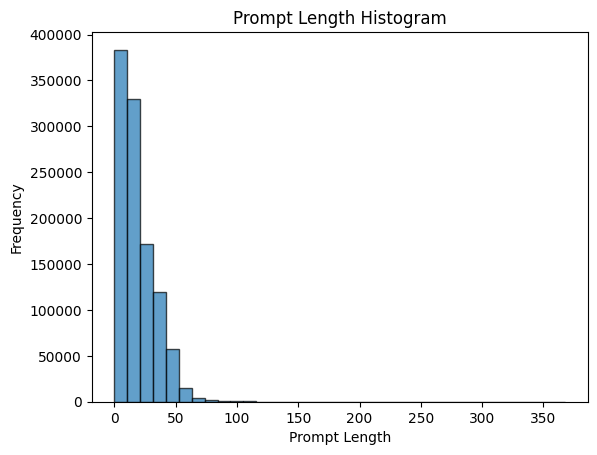

In [ ]:
import matplotlib.pyplot as plt

text_lengths = prompts_df.prompt.str.split().apply(lambda x: sum(word.isalpha() for word in x))

plt.hist(text_lengths, bins=35, edgecolor='k', alpha=0.7)
plt.xlabel('Prompt Length')
plt.ylabel('Frequency')
plt.title('Prompt Length Histogram')
plt.show()

In [ ]:
MAX_SEQ_LENGTH = 30

def create_caption_data(prompts_df, tokenizer):

    # Create torchtext vocab
    counter = Counter()
    for prompt in prompts_df["prompt"]:
        for word in tokenizer(prompt):
            if word.isalpha():
                word = word.lower()
                counter.update(word)

    vocab = torchtext.vocab.vocab(counter, min_freq = 5)
    for special_token, index in zip(["<UNK>", "<PAD>", "<BOS>", "<EOS>"], [0, 1, 2, 3]):
        vocab.insert_token(special_token, index)
    vocab.set_default_index(0)

    return vocab

def get_transforms(train_val_test):
    train_transforms = T.Compose([T.RandomCrop((210,210)), T.RandomRotation(degrees=(-15, 15)),
                 T.RandomHorizontalFlip(), T.ToTensor(),
                 T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                 T.RandomErasing()])

    val_transforms = T.Compose([T.ToTensor(),
                 T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

    return train_transforms if train_val_test == "train" else val_transforms

class CaptionDataset:
    def __init__(
        self, data_root_path, dataframe, vocab, tokenizer, max_seq_len, train_val_test
    ):
        self.data_root_path = data_root_path
        self.dataframe = dataframe.copy()
        self.tokenizer = tokenizer
        self.vocab = vocab
        self.max_seq_len = max_seq_len
        self.transforms = get_transforms(train_val_test)

    def __getitem__(self, idx):
        # Image
        image_filename, caption = self.dataframe.iloc[idx]

        image = Image.open(f"{self.data_root_path}/{image_filename}").convert("RGB")
        image = self.transforms(image)

        # Captions
        pad_idx = self.vocab["<PAD>"]
        bos_idx = self.vocab["<BOS>"]
        eos_idx = self.vocab["<EOS>"]
        pad_starts = None

        tokens = [self.vocab[token.lower()] for token in self.tokenizer(caption) if token.isalpha()]
        tokens = [bos_idx] + tokens + [eos_idx]

        # Pad tokens and ensure the length equals self.max_seq_len
        if len(tokens) <= self.max_seq_len:
            pad_starts = len(tokens)
            tokens += [pad_idx] * (self.max_seq_len - len(tokens))
        else:
            tokens = tokens[: self.max_seq_len - 1] + [eos_idx]

        assert len(tokens) == self.max_seq_len
        tokens = torch.tensor(tokens, dtype=torch.long)

        mask = torch.ones(self.max_seq_len)
        if pad_starts is not None:
            mask[pad_starts:] = 0

        enc_mask = torch.ones(49)

        return image, tokens, mask, enc_mask

    def __len__(self):
        return len(self.dataframe)


In [ ]:
# Uncomment to make vocabulary
# vocab = create_caption_data(prompts_df[prompts_df.part == 'train'], word_tokenize)

# with open('/content/vocab.pkl', 'wb') as file:
#     pickle.dump(vocab, file)

In [ ]:
!wget -O 'vocab.zip' $'https://www.dropbox.com/scl/fi/r3x83ztety6h40hjz2yl7/vocab.zip?rlkey=cvim2e75cnqsv8m0sx1kaj7gi&dl=0'
!unzip -q $'/content/vocab.zip' -d $'/content/'
os.remove('/content/vocab.zip')

--2024-01-14 14:25:54--  https://www.dropbox.com/scl/fi/r3x83ztety6h40hjz2yl7/vocab.zip?rlkey=cvim2e75cnqsv8m0sx1kaj7gi&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4948ac85713cfef360757e2e7c.dl.dropboxusercontent.com/cd/0/inline/CLVEL2Oft6zog4HcGUIu1kcYnGugQUNmn88fJIJis90_7Xz_zLZhYbM3dET96LfoVPYQMkzo5aV1IeftvKeL6Z1nEkj3gekxpBkysrjFfK3EOVF-7rUQ3jF4XA623y3o6uZhiKIWmxiEqm0cPJEqXvIv/file# [following]
--2024-01-14 14:25:54--  https://uc4948ac85713cfef360757e2e7c.dl.dropboxusercontent.com/cd/0/inline/CLVEL2Oft6zog4HcGUIu1kcYnGugQUNmn88fJIJis90_7Xz_zLZhYbM3dET96LfoVPYQMkzo5aV1IeftvKeL6Z1nEkj3gekxpBkysrjFfK3EOVF-7rUQ3jF4XA623y3o6uZhiKIWmxiEqm0cPJEqXvIv/file
Resolving uc4948ac85713cfef360757e2e7c.dl.dropboxusercontent.com (uc4948ac85713cfef360757e2e7c.dl.dropboxusercontent.com)... 162.125.81.15, 

In [ ]:
with open('/content/vocab.pkl', 'rb') as fp:
    vocab = pickle.load(fp)

In [ ]:
train_dataset = CaptionDataset("/content/images",
                               prompts_df[prompts_df.part == 'train'][['image_name', 'prompt']],
                               vocab, word_tokenize, MAX_SEQ_LENGTH, "train")
val_dataset = CaptionDataset("/content/images",
                             prompts_df[prompts_df.part == 'val'][['image_name', 'prompt']],
                             vocab, word_tokenize, MAX_SEQ_LENGTH, "val")
test_dataset = CaptionDataset("/content/images",
                              prompts_df[prompts_df.part == 'test'][['image_name', 'prompt']],
                              vocab, word_tokenize, MAX_SEQ_LENGTH, "test")

print('Training set length: {}'.format(len(train_dataset)))
print('Validation set length: {}'.format(len(val_dataset)))
print('Test set length: {}'.format(len(test_dataset)))

train_loader = DataLoader(dataset=train_dataset, batch_size=200, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=128, shuffle=False)

Training set length: 984245
Validation set length: 50000
Test set length: 50000


## 4. Create model

In [ ]:
# ResNet50 Backbone
class BackboneCNN(nn.Module):
    def __init__(self):
        super(BackboneCNN, self).__init__()
        resnet = models.resnet50(pretrained=True)
        for param in resnet.parameters():
            param.requires_grad_(False)

        # Remove 2 last layers (AveragePooling, FullyConnected)
        modules = list(resnet.children())[:-2]
        self.resnet = nn.Sequential(*modules)

    def forward(self, images: Tensor) -> Tensor:
        features = self.resnet(images)           # (batch_size, 2048, 7, 7)
        features = features.permute(0, 2, 3, 1)  # (batch_size, 7, 7, 2048)

        # Reshape to (batch_size, n_tokens=7*7, features_dim=2048)
        features = features.view(features.size(0), -1, features.size(-1))   # (batch_size, n_tokens=49, features_dim=2048)
        return features

In [ ]:
# Multiheaded attention module
class MultiHeadAttention(nn.Module):
    def __init__(self, d_k, d_model_1, d_model_2, n_heads, max_len, causal=False):
        super().__init__()

        # d_v = d_k
        self.d_k = d_k
        self.n_heads = n_heads

        self.query = nn.Linear(d_model_2, d_k * n_heads)
        self.key = nn.Linear(d_model_1, d_k * n_heads)
        self.value = nn.Linear(d_model_1, d_k * n_heads)

        # final linear layer
        self.fc = nn.Linear(d_k * n_heads, d_model_2)

        # causal mask
        # make it so that diagonal is 0 too
        # this way we don't have to shift the inputs to make targets
        self.causal = causal
        if causal:
            cm = torch.tril(torch.ones(max_len, max_len))
            self.register_buffer(
                "causal_mask",
                cm.view(1, 1, max_len, max_len)
            )

    def forward(self, q, k, v, pad_mask=None):
        # h = n_heads
        q = self.query(q) # (batch_size, seq_len, h*d_k)
        k = self.key(k)   # (batch_size, seq_len, h*d_k)
        v = self.value(v) # (batch_size, seq_len, h*d_v)

        N = q.shape[0]    # batch size
        T_output = q.shape[1]
        T_input = k.shape[1]

        # (batch_size, seq_len, h, d_k) -> (batch_size, h, seq_len, d_k)
        q = q.view(N, T_output, self.n_heads, self.d_k).transpose(1, 2)
        k = k.view(N, T_input, self.n_heads, self.d_k).transpose(1, 2)
        v = v.view(N, T_input, self.n_heads, self.d_k).transpose(1, 2)

        # compute attention weights
        # (batch_size, h, seq_len, d_k) x (batch_size, h, d_k, seq_len) --> (batch_size, h, seq_len, seq_len)
        attn_scores = q @ k.transpose(-2, -1) / math.sqrt(self.d_k)
        if pad_mask is not None:
            attn_scores = attn_scores.masked_fill(
                pad_mask[:, None, None, :] == 0, float('-inf'))
        if self.causal:
            attn_scores = attn_scores.masked_fill(
                self.causal_mask[:, :, :T_output, :T_input] == 0, float('-inf'))
        attn_weights = F.softmax(attn_scores, dim=-1)

        # compute attention-weighted values
        # (batch_size, h, seq_len, seq_len) x (batch_size, h, seq_len, d_k) --> (batch_size, h, seq_len, d_k)
        A = attn_weights @ v

        # reshape it back before final linear layer
        A = A.transpose(1, 2) # (batch_size, seq_len, h, d_k)
        A = A.contiguous().view(N, T_output, self.d_k * self.n_heads) # (batch_size, seq_len, h*d_k)

        return self.fc(A)

In [ ]:
# Encoder block module
class EncoderBlock(nn.Module):
    def __init__(self, d_k, d_encoder, n_heads, max_len, dropout_prob=0.1):
        super().__init__()

        self.ln1 = nn.LayerNorm(d_encoder)
        self.ln2 = nn.LayerNorm(d_encoder)
        self.mha = MultiHeadAttention(d_k, d_encoder, d_encoder, n_heads, max_len, causal=False)
        self.ann = nn.Sequential(
            nn.Linear(d_encoder, d_encoder * 4),
            nn.GELU(),
            nn.Linear(d_encoder * 4, d_encoder),
            nn.Dropout(dropout_prob),
        )
        self.dropout = nn.Dropout(p=dropout_prob)

    def forward(self, x, pad_mask=None):
        x = self.ln1(x + self.mha(x, x, x, pad_mask))
        x = self.ln2(x + self.ann(x))
        x = self.dropout(x)
        return x

In [ ]:
# Encoder module
class Encoder(nn.Module):
    def __init__(self,
                max_len,
                d_k,
                d_encoder,
                n_heads,
                n_layers,
                dropout_prob):
        super().__init__()

        self.backboneCNN = BackboneCNN()
        self.pos_encoding = PositionalEncoding(d_encoder, 49, dropout_prob)
        transformer_blocks = [
            EncoderBlock(
                d_k,
                d_encoder,
                n_heads,
                max_len,
                dropout_prob) for _ in range(n_layers)]
        self.transformer_blocks = nn.Sequential(*transformer_blocks)
        self.ln = nn.LayerNorm(d_encoder)

    def forward(self, x, pad_mask=None):
        x = self.backboneCNN(x)
        x = self.pos_encoding(x)
        for block in self.transformer_blocks:
            x = block(x, pad_mask)

        x = self.ln(x)
        return x

In [ ]:
# Decoder block module
class DecoderBlock(nn.Module):
    def __init__(self, d_k, d_encoder, d_model, n_heads, max_len, dropout_prob=0.1):
        super().__init__()

        self.ln1 = nn.LayerNorm(d_model)
        self.ln2 = nn.LayerNorm(d_model)
        self.ln3 = nn.LayerNorm(d_model)
        self.mha1 = MultiHeadAttention(d_k, d_model, d_model, n_heads, max_len, causal=True)
        self.mha2 = MultiHeadAttention(d_k, d_encoder, d_model, n_heads, max_len, causal=False)
        self.ann = nn.Sequential(
            nn.Linear(d_model, d_model * 4),
            nn.GELU(),
            nn.Linear(d_model * 4, d_model),
            nn.Dropout(dropout_prob),
        )
        self.dropout = nn.Dropout(p=dropout_prob)

    def forward(self, enc_output, dec_input, enc_mask=None, dec_mask=None):
        # self-attention on decoder input
        x = self.ln1(
            dec_input + self.mha1(dec_input, dec_input, dec_input, dec_mask))

        # multi-head attention including encoder output
        x = self.ln2(x + self.mha2(x, enc_output, enc_output, enc_mask))

        x = self.ln3(x + self.ann(x))
        x = self.dropout(x)
        return x

In [ ]:
# Positional encoding module
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=20, dropout_prob=0.1):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout_prob)

        position = torch.arange(max_len).unsqueeze(1)
        exp_term = torch.arange(0, d_model, 2)
        div_term = torch.exp(exp_term * (-math.log(10000.0) / d_model))
        pe = torch.zeros(1, max_len, d_model)
        pe[0, :, 0::2] = torch.sin(position * div_term)
        pe[0, :, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x.shape: batch_size x seq_len x embedding_dimension
        x = x + self.pe[:, :x.size(1), :]
        return self.dropout(x)

In [ ]:
# Decoder module
class Decoder(nn.Module):
    def __init__(self,
                vocab_size,
                max_len,
                d_k,
                d_encoder,
                d_model,
                n_heads,
                n_layers,
                dropout_prob):
        super().__init__()

        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_encoding = PositionalEncoding(d_model, max_len, dropout_prob)
        transformer_blocks = [
            DecoderBlock(
                d_k,
                d_encoder,
                d_model,
                n_heads,
                max_len,
                dropout_prob) for _ in range(n_layers)]
        self.transformer_blocks = nn.Sequential(*transformer_blocks)
        self.ln = nn.LayerNorm(d_model)
        self.fc = nn.Linear(d_model, vocab_size)

    def forward(self, enc_output, dec_input, enc_mask=None, dec_mask=None):
        x = self.embedding(dec_input)
        x = self.pos_encoding(x)
        for block in self.transformer_blocks:
          x = block(enc_output, x, enc_mask, dec_mask)
        x = self.ln(x)
        x = self.fc(x)
        return x

In [ ]:
# Complete transformer model
class Transformer(nn.Module):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, enc_input, dec_input, enc_mask, dec_mask):
        enc_output = self.encoder(enc_input)
        dec_output = self.decoder(enc_output, dec_input, enc_mask, dec_mask)
        return dec_output

In [ ]:
enc_seq_len = 49
d_k = 16
d_encoder = 2048
d_decoder = 512
n_heads = 4
n_layers = 2
dropout_prob = 0.2

In [ ]:
encoder = Encoder(max_len=enc_seq_len,
                  d_k=d_k,
                  d_encoder=d_encoder,
                  n_heads=n_heads,
                  n_layers=n_layers,
                  dropout_prob=dropout_prob
                  )

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 79.5MB/s]


In [ ]:
decoder = Decoder(vocab_size=len(vocab),
                  max_len=MAX_SEQ_LENGTH,
                  d_k=d_k,
                  d_encoder=d_encoder,
                  d_model=d_decoder,
                  n_heads=n_heads,
                  n_layers=n_layers,
                  dropout_prob=dropout_prob
                  )

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
model = Transformer(encoder, decoder)

model.to(device)

criterion = nn.CrossEntropyLoss(ignore_index=train_dataset.vocab.get_stoi()["<PAD>"])
optimizer = optim.Adam(model.parameters(), lr=0.0003)

### 5. Training loop

In [ ]:
# Create paths
losses_dir = '/content/drive/MyDrive/projekt_gsn/checkpoints/'
weights_dir = '/content/drive/MyDrive/projekt_gsn/checkpoints/transformer/'

if not os.path.exists(losses_dir):
    os.mkdir(losses_dir)

if not os.path.exists(weights_dir):
    os.mkdir(weights_dir)

In [ ]:
losses_file_name = 'transformer_losses.csv'

last_epoch = None
if os.path.exists(losses_dir):
    losses_df = pd.read_csv(losses_dir + losses_file_name)
    last_epoch = losses_df.Epoch.max()
    print(f'Last epoch {last_epoch}')
else:
    losses_df = pd.DataFrame(columns=['Epoch','Train_loss','Val_loss'])

Last epoch 90


In [ ]:
if last_epoch is not None:
    weights_path = f'{weights_dir}checkpoint_epoch{71}.pth'

    checkpoint = torch.load(weights_path)
    model.load_state_dict(checkpoint['model_state_dict'])

In [ ]:
num_epochs = 100
train_loss_meter = []
val_loss_meter = []

train_history = []
val_history = []

for epoch in range(last_epoch+1 if last_epoch is not None else 1, num_epochs+1):
    t0 = datetime.now()
    print(f"Epoch {epoch}")
    for idx, batch in enumerate(train_loader):
        image, caption, mask, enc_mask = batch
        model.train()
        image, caption, mask, enc_mask = image.to(device), caption.to(device), mask.to(device), enc_mask.to(device)
        optimizer.zero_grad()
        pred = model(image, caption[:, :-1], enc_mask, mask[:, :-1])
        pred = pred.view(-1, len(vocab))
        caption = caption[:, 1:].contiguous().view(-1)
        train_loss = criterion(pred, caption)
        train_loss_meter.append(train_loss.item())
        train_loss.backward()
        optimizer.step()

    train_avg_loss = np.mean(train_loss_meter)
    train_history.append(train_avg_loss)
    train_loss_meter = []
    print("Epoch: {} train loss: {:.5f}".format(epoch, train_avg_loss))

    for idx, batch in enumerate(val_loader):
        image, caption, mask, enc_mask = batch
        model.eval()
        image, caption, mask, enc_mask = image.to(device), caption.to(device), mask.to(device), enc_mask.to(device)
        pred = model(image, caption[:, :-1], enc_mask, mask[:, :-1])
        pred = pred.view(-1, len(vocab))
        caption = caption[:, 1:].contiguous().view(-1)
        val_loss = criterion(pred, caption)
        val_loss_meter.append(val_loss.item())

    val_avg_loss = np.mean(val_loss_meter)
    val_history.append(val_avg_loss)
    val_loss_meter = []
    print("Epoch: {} val   loss: {:.5f}".format(epoch, val_avg_loss))
    dt = datetime.now() - t0
    print(f"Duration: {dt}")

    # Save model params
    training_state = {'epoch': epoch, 'val_loss': val_avg_loss, 'model_state_dict': model.state_dict(),
                        'optimizer_state_dict': optimizer.state_dict()}
    torch.save(training_state, f'{weights_dir}checkpoint_epoch{epoch}.pth')

    epoch_losses = pd.DataFrame(data={'Epoch': epoch, 'Train_loss': train_avg_loss, 'Val_loss': val_avg_loss}, index=[epoch-1])
    losses_df = pd.concat([losses_df, epoch_losses])
    losses_df.to_csv(losses_dir + losses_file_name, index=False)

Epoch 85
Epoch: 85 train loss: 2.31195
Epoch: 85 val   loss: 3.69897
Duration: 2:01:54.463159
Epoch 86
Epoch: 86 train loss: 2.30035
Epoch: 86 val   loss: 3.68063
Duration: 2:01:42.233466
Epoch 87
Epoch: 87 train loss: 2.29637
Epoch: 87 val   loss: 3.68441
Duration: 2:01:38.382424
Epoch 88
Epoch: 88 train loss: 2.29156
Epoch: 88 val   loss: 3.68218
Duration: 2:01:28.191302
Epoch 89
Epoch: 89 train loss: 2.28830
Epoch: 89 val   loss: 3.70769
Duration: 2:01:22.595177
Epoch 90
Epoch: 90 train loss: 2.28539
